In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

from pprint import pprint
import sys
from colorama import Style, Fore

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rc('axes', unicode_minus=False)

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL


In [483]:
train = pd.read_csv('train.csv').drop('ID',axis  = 1)
test = pd.read_csv('test.csv').drop('ID',axis = 1)
df = train.copy()

In [484]:
df.head()

,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


In [485]:
def summarize(data):
    
    size = round(sys.getsizeof(df) / 1024 **2,2)
    
    print(f'data size : {size}MB')
    
    result = pd.DataFrame()
    
    result['Dtype'] = data.dtypes.values
    result['Count'] = data.count().values
    result['Nunique'] = data.nunique().values
    result['Missing value'] = data.isna().sum().values
    result['Most Freq Value'] = data.mode().iloc[0].values
    result['Min'] = data.describe(include = 'all').T['min'].values
    result['Max'] = data.describe(include = 'all').T['max'].values
    result['Mean'] = data.describe(include = 'all').T['mean'].values
    result['Median'] = data.describe(include = 'all').T['50%'].values
    result = result.set_index(data.columns)
    return result

In [486]:
summarize(df)

data size : 17.94MB


,Dtype,Count,Nunique,Missing value,Most Freq Value,Min,Max,Mean,Median
생산년도,int64,57920,39,0,2009,1978.0,2022.0,2011.355352,2011.0
모델출시년도,int64,57920,34,0,2008,1983.0,2021.0,2008.033408,2008.0
브랜드,object,57920,20,0,opel,NaN,NaN,NaN,NaN
차량모델명,object,57920,143,0,astra,NaN,NaN,NaN,NaN
판매도시,object,57920,3224,0,WAR,NaN,NaN,NaN,NaN
판매구역,object,57920,17,0,MAZ,NaN,NaN,NaN,NaN
주행거리,int64,57920,20994,0,1,1.0,2500000.0,167869.088398,171000.0
배기량,int64,57920,347,0,1598,875.0,6300.0,1788.160135,1753.0
압축천연가스(CNG),int64,57920,2,0,0,0.0,1.0,0.000483,0.0
경유,int64,57920,2,0,0,0.0,1.0,0.425242,0.0


### **Insight**

**1. 결측치는 없다**

**2. 4개의 범주형 변수,10개의 수치형 변수로 이뤄져있음**

**2.1 모든 수치형 변수의 타입들이 int64, float64 로 꽤 큰 형태**

**3. 범주형 변수들이 엄청나게 다양하다. 판매도시는 무려 3224개로 무지 많다**

**4. 압축천연가스, 경유, 가솔린, 하이브리드, 액화석유가스 등은 범주형 변수지만 int type 으로 mapping 되어 있음**
**4.1 해당 변수들은 string 형태로 바꿔주자 나중에 딕셔너리로 관리하려고 한다**

In [487]:
cols = ['압축천연가스(CNG)', '경유', '가솔린', '하이브리드', '액화석유가스(LPG)']

for col in cols:
    df[col] = df[col].astype(str)
    test[col] = test[col].astype(str)

df.head()

,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


# **데이터 사이즈 줄이기**

In [488]:
class ReduceMemory:
    

        
    def fit_transform(self,data):
        
        self.data = data
        
        cols = self.data.columns
        
        # 원본 data 사이즈
        raw_datasize = round(sys.getsizeof(df)/1024**2,2)
        print(f'{mgt}ReduceMemory Start{res}\n')
        print('--' * 20)
        original_lable = {}
        
        for col in cols:
            
            dtype = self.data[col].dtype
            
            if dtype == 'object':
                
                before_size = round(sys.getsizeof(self.data[col]) / 1024 ** 2,2)
                
                transformlabel = {v:k for k,v in enumerate(self.data[col].unique())}
                raw_label = {k:v for k,v in enumerate(self.data[col].unique())}
                
                self.data[col] = self.data[col].map(transformlabel).astype('int8')

                after_size = round(sys.getsizeof(self.data[col]) / 1024 ** 2,2)
            
                original_lable[col] = raw_label 

                print(f'{blu}{col}{res} {blu}{before_size}MB {gld}-> {red}{after_size}MB{res}',sep = '\t')


                
                
            elif dtype == 'float':
                
                before_size = round(sys.getsizeof(self.data[col]) / 1024 ** 2,2)
                
                min_value,max_value = self.data[col].min(), self.data[col].max()
                

                if min_value >= np.finfo('float16').min and max_value <= np.finfo('float16').max:
                    self.data[col] = self.data[col].astype('float16')
                elif min_value >= np.finfo('float32').min and max_value <= np.finfo('float32').max:
                    self.data[col] = self.data[col].astype('float32')
                else:
                    self.data[col] = self.data[col].astype('float64')
                    
                after_size = round(sys.getsizeof(self.data[col]) / 1024**2,2)
                
                print(f'{blu}{col}{res} {blu}{before_size}MB {gld}-> {red}{after_size}MB{res}',sep = '\t')

                
            else:
                
                before_size = round(sys.getsizeof(self.data[col]) / 1024 ** 2,2)
                
                min_value,max_value = self.data[col].min(), self.data[col].max()
                
                if min_value >= np.iinfo('int8').min and max_value <= np.iinfo('int8').max:
                    self.data[col] = self.data[col].astype('int8')
                if min_value >= np.iinfo('int16').min and max_value <= np.iinfo('int16').max:
                    self.data[col] = self.data[col].astype('int16')
                elif min_value >= np.iinfo('int32').min and max_value <= np.iinfo('int32').max:
                    self.data[col] = self.data[col].astype('int32')
                else:
                    self.data[col] = self.data[col].astype('int64')
                    
                after_size = round(sys.getsizeof(self.data[col]) / 1024**2,2)
                
                print(f'{blu}{col}{res} {blu}{before_size}MB {gld}-> {red}{after_size}MB{res}',sep = '\t')
                
        after_datasize = round(sys.getsizeof(self.data) / 1024**2,2)
        
        print('--' * 20)
        print(f'{mgt}Reduce Memory Done{mgt} \n')
        print(f'{blu}Original data size :{raw_datasize}MB{res}')    
        print(f'{red}After data size : {after_datasize}MB{res}')
        
        return self.data,original_lable

In [489]:
reduce_memory = ReduceMemory()

df,original_label = reduce_memory.fit_transform(df)

ReduceMemory Start

----------------------------------------
생산년도 0.44MB -> 0.11MB
모델출시년도 0.44MB -> 0.11MB
브랜드 3.46MB -> 0.06MB
차량모델명 3.43MB -> 0.06MB
판매도시 3.31MB -> 0.06MB
판매구역 3.31MB -> 0.06MB
주행거리 0.44MB -> 0.22MB
배기량 0.44MB -> 0.11MB
압축천연가스(CNG) 3.2MB -> 0.06MB
경유 3.2MB -> 0.06MB
가솔린 3.2MB -> 0.06MB
하이브리드 3.2MB -> 0.06MB
액화석유가스(LPG) 3.2MB -> 0.06MB
가격 0.44MB -> 0.11MB
----------------------------------------
Reduce Memory Done 

Original data size :31.75MB
After data size : 1.16MB


# **EDA**

In [490]:
obj_cols = original_label.keys()
num_cols = list(set(df.columns) - set(obj_cols))

print('범주형 변수',obj_cols, sep = '\t')
print('수치형 변수',num_cols, sep = '\t')

범주형 변수	dict_keys(['브랜드', '차량모델명', '판매도시', '판매구역', '압축천연가스(CNG)', '경유', '가솔린', '하이브리드', '액화석유가스(LPG)'])
수치형 변수	['생산년도', '배기량', '주행거리', '모델출시년도', '가격']


### **범주형 변수 EDA**

In [491]:
df.columns

Index(['생산년도', '모델출시년도', '브랜드', '차량모델명', '판매도시', '판매구역', '주행거리', '배기량',
       '압축천연가스(CNG)', '경유', '가솔린', '하이브리드', '액화석유가스(LPG)', '가격'],
      dtype='object')

In [492]:
class ObjectEDA:
    
    def __init__(self,data,cols,label):
        self.cols = cols
        self.data = data
        self.label = label 
        
    def histplot(self):
        
        cols = self.cols 
        
        fig,ax = plt.subplots(ncols = math.ceil(len(cols) / 3), nrows = 3,
                                figsize = (15,10))
        ax = ax.flatten()
        fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
        
        for i,col in enumerate(cols):
            sns.histplot(data = self.data,
                            x = col,
                            kde = True,
                            color = 'red',
                            ax = ax[i])
            
            if i % 3 != 0:
                ax[i].set_ylabel('')
            else:
                ax[i].set_ylabel('빈도')
            ax[i].set_xlabel('')
            ax[i].set_title(col)
            
        fig.suptitle('범주형 변수 히스토그램',fontsize = 20, weight = 'bold')
        
    def top_n(self,col,n):
        
        self.result = pd.DataFrame()
        
        self.result['feature'] = self.data[col].value_counts().iloc[:n].keys()
        self.result['frequency'] = self.data[col].value_counts().iloc[:n].values

        
        return self.result        

    def countplot(self,n):
        
        cols = self.label.keys() # labeling 전 범주형 변수 목록
        
        fig,ax = plt.subplots(ncols = math.ceil(len(cols) / 3), nrows = 3,
                                figsize = (15,15))
        ax = ax.flatten()
        
        fig.subplots_adjust(hspace = 0.3,wspace = 0.3)
        
        for i,col in enumerate(cols):
            
            self.graph_df = self.top_n(col,n)
            self.graph_df['feature'] = self.graph_df['feature'].map(self.label[col])
            
            # 이진 범주형 변수인 경우엔 정렬을 0,1 순으로 하기  
            
            
            
            if len(self.graph_df['feature']) <= 2:
                order = ['0','1']
                xticks_label = ['0','1']
            else:
                order = None
                xticks_label = self.graph_df['feature']
                
            
            sns.barplot(data = self.graph_df,
                            x = 'feature',
                            y = 'frequency',
                            ci = None,
                            palette = 'YlOrRd_r',
                            order = order,
                            ax = ax[i])
            
            if i % 3 != 0:
                ax[i].set_ylabel('')
            else:
                ax[i].set_ylabel('빈도')
                
            ax[i].set_xlabel('')
            ax[i].set_title(col)    
            ax[i].set_xticklabels(labels = xticks_label,rotation = 90)
            
        fig.suptitle(f'범주형 변수 중 상위 {n} 개 빈도')
        
    def boxplot(self,n,target):
        
        self.target = target
        
        cols = self.label.keys() # labeling 전 범주형 변수 목록
        
        fig,ax = plt.subplots(ncols = math.ceil(len(cols) / 3), nrows = 3,
                                figsize = (15,15))
        ax = ax.flatten()
        
        fig.subplots_adjust(hspace = 0.3,wspace = 0.3)
        
        for i,col in enumerate(cols):
            
            feature_list = self.top_n(col,n)['feature'].tolist()
            
            graph_df = self.data.loc[self.data[col].isin(feature_list)].copy()
            
            graph_df.loc[:,col] = graph_df[col].map(self.label[col])
            
            
            if len(feature_list) <= 2:
                order = ['0','1']
                xticks_list = ['0','1']
            else:
                order = None
                xticks_list = [self.label[col][x] for x in feature_list]
            
            sns.boxplot(data = graph_df,
                            x = col,
                            y = self.target,
                            palette = 'YlOrRd',
                            order = order,
                            ax = ax[i])
            if i % 3 != 0:
                ax[i].set_ylabel('')
            else:
                ax[i].set_ylabel(target)
                
            ax[i].set_xlabel('')
            ax[i].set_title(col)    
            ax[i].set_xticklabels(labels = xticks_list,rotation = 90)


        fig.suptitle(f'범주형 변수 중 빈도 상위 {n}개의 박스 플롯')


In [493]:
obj_eda = ObjectEDA(df,obj_cols,original_label)

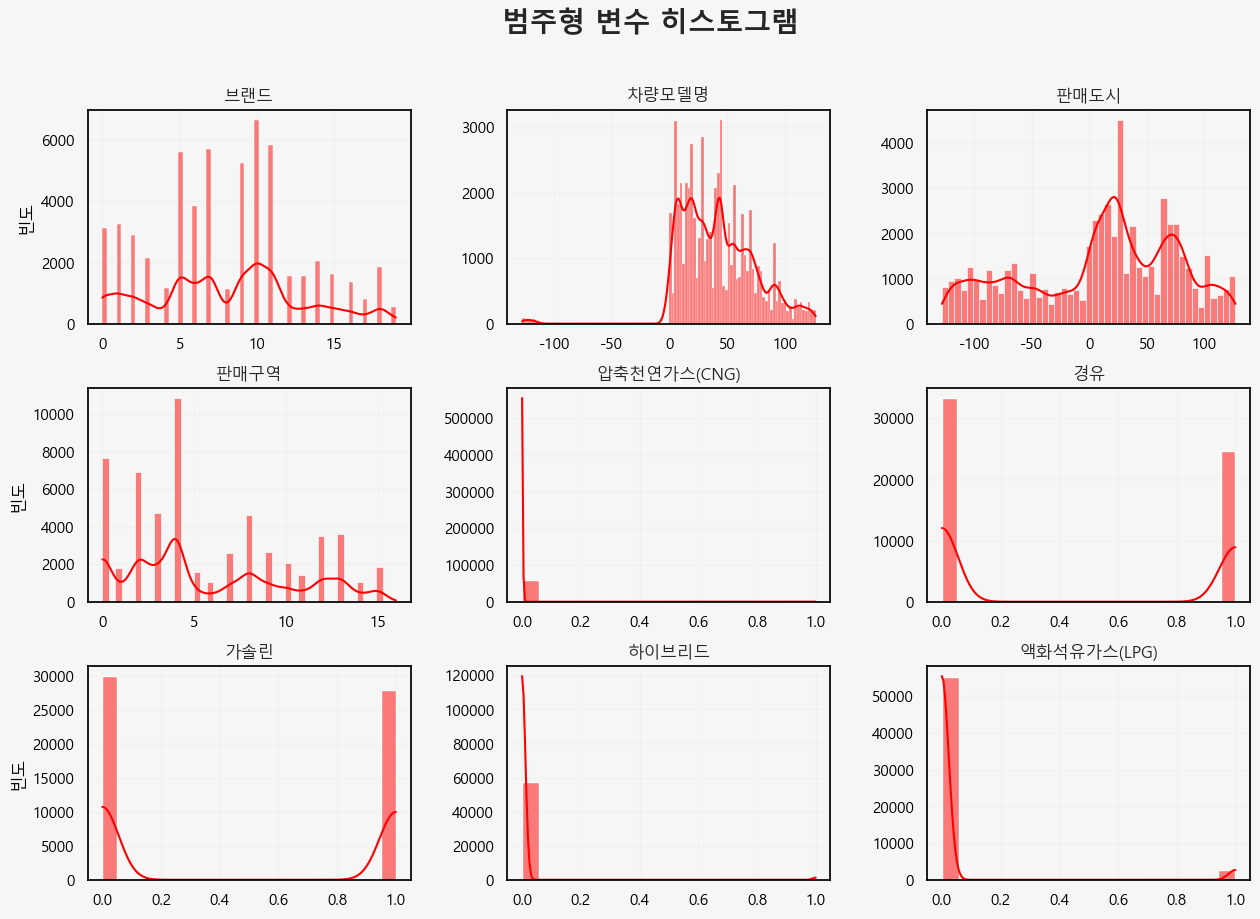

In [494]:
obj_eda.histplot()

### **Insight**

**1. 판매도시와 판매구역의 경우에는 데이터 별 균등하지 않고 편차가 있다.**

**2. 주행거리의 경우에는 오른쪽으로 꼬리가 긴 분포의 모습을 보이며 이상치가 있는 것으로 보인다.**

**3. 배기량도 오른쪽으로 꼬리가 긴 분포의 모습으로, 이상치가 있어보인다.**

**4. 차량 연로는 경유와 가솔린의 경우에는 비율이 50 : 50으로 비슷하며 기타 연료들은 대부분 0인 경우가 많다.**

**5. 가격의 경우에도 오른쪽으로 꼬리가 긴 형태의 분포 모습을 보인다.**

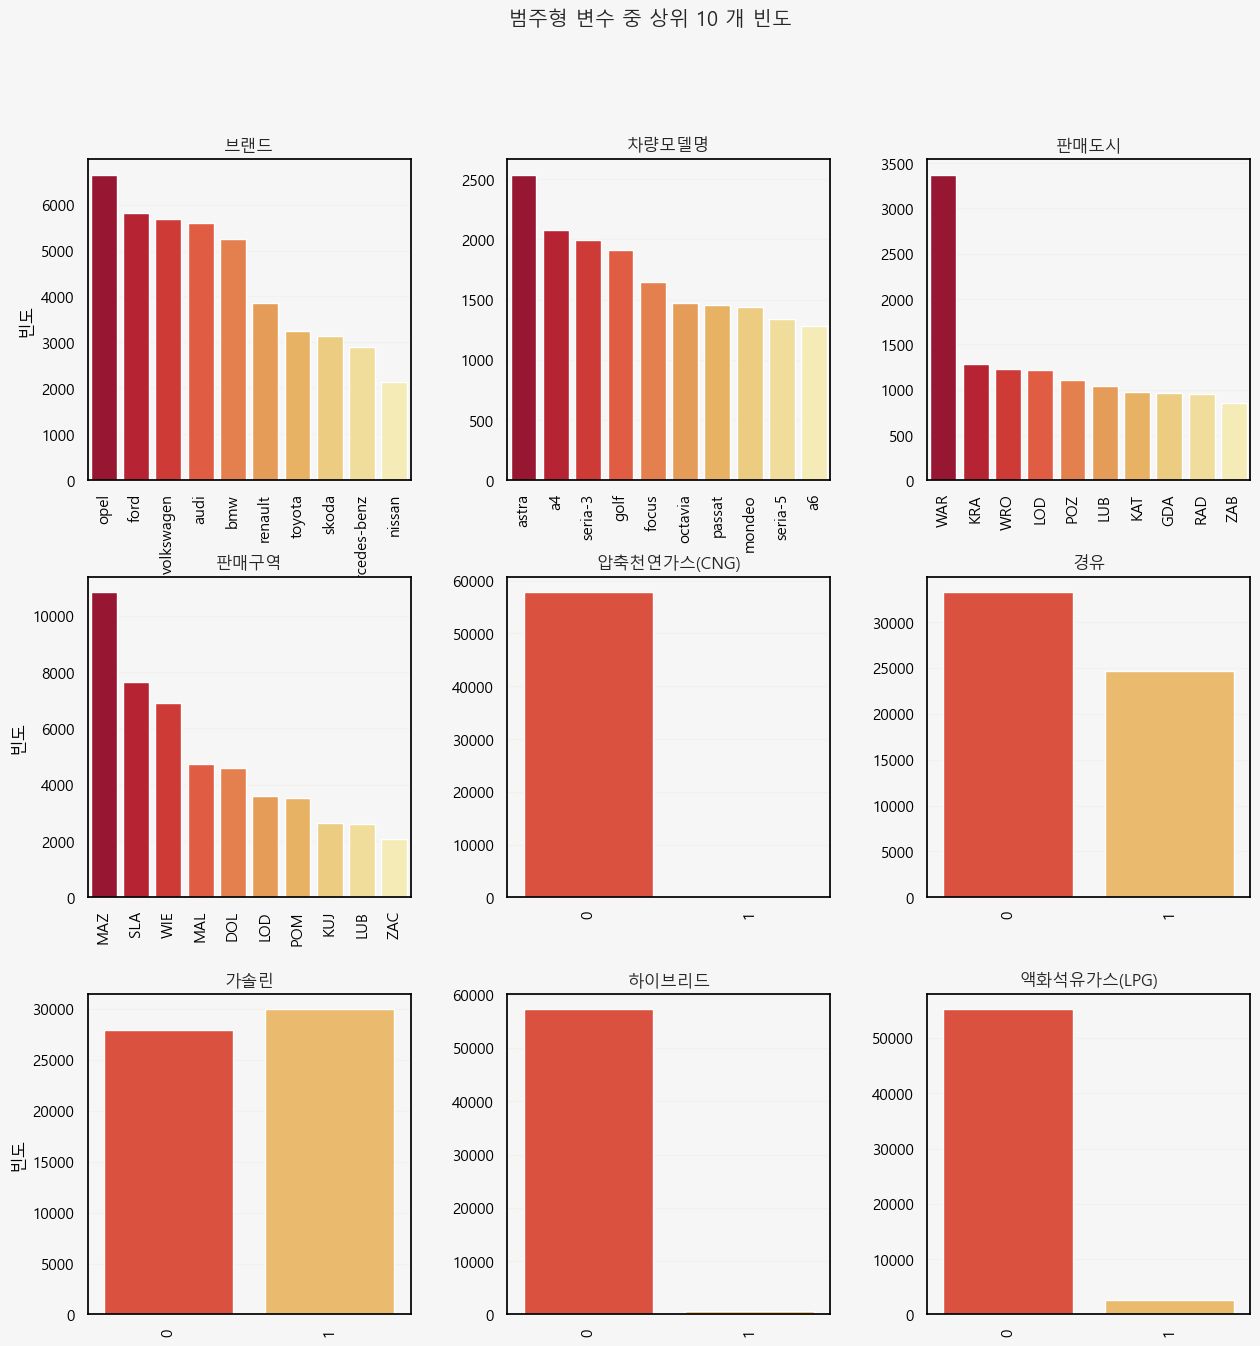

In [495]:
obj_eda.countplot(n = 10)

### **Insight**

**1. 상위 10개의 브랜드 중 가장 높은 빈도였던 것은 Opel이였다. 상위 5개 까지는 5000개 이상으로 많은 빈도수를 보였다.**

**2. 판매 도시는 WAR 지역에서의 빈도수가 가장 높았으며 WAR를 제외하고서는 상위 9개의 판매 도시는 차이가 상이하지 않았다.**

**3. 판매구역은 MAZ 지역이 10000 개 이상으로 가장 높았으며 상위 3개까지는 5000개 이상으로 많은 빈도수를 보였다.**

**4. 대부분의 차량들은 경유와 가솔린 차량인 경우가 가장 많았다.**

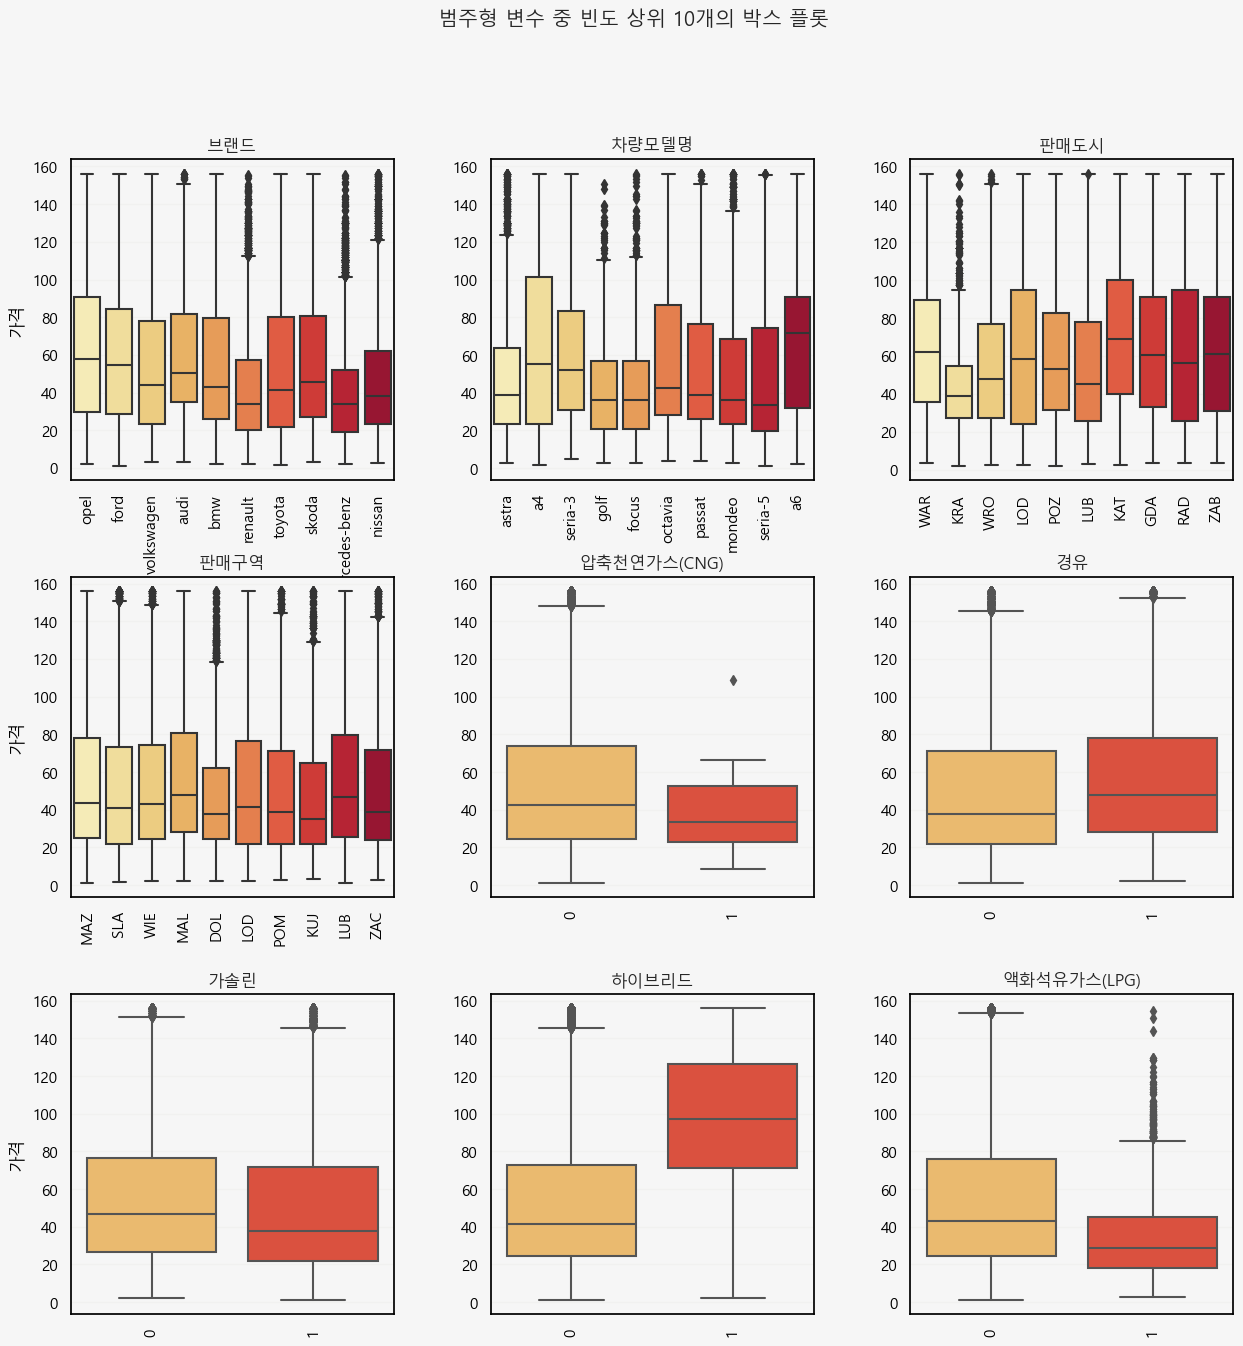

In [496]:
obj_eda.boxplot(n = 10, target = '가격')

### **Insight**

**1. 차랑 연료들 중에서는 하이브리드 차량의 판매가격이 가장 높았던 것으로 보인다.**

**2. 가솔린차량과 경유 차량들 중을 비교하면 경유 차량의 가격이 가솔린 차량들에 비해 가격이 더욱 높은 것으로 보인다.**

**3. 천연 가스를 연료로 하는 차량은 가격이 비교적 낮은 편에 속하는 것으로 보인다.**

# **수치형 변수 EDA**

In [497]:
class NumericEDA:
    
    def __init__(self,data,cols):
        
        self.cols = cols
        self.data = data[self.cols] 
        
    def histplot(self):
        
        cols = self.cols 
        
        fig,ax = plt.subplots(ncols = math.ceil(len(cols) / 2), nrows = 2,
                                figsize = (15,5))
        ax = ax.flatten()
        fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
        
        for i,col in enumerate(cols):
            sns.histplot(data = self.data,
                            x = col,
                            kde = True,
                            color = 'red',
                            ax = ax[i])
            
            if i % 3 != 0:
                ax[i].set_ylabel('')
            else:
                ax[i].set_ylabel('빈도')
            ax[i].set_xlabel('')
            ax[i].set_title(col)
            
        fig.suptitle('수치형 변수 히스토그램',fontsize = 20, weight = 'bold')
        
    def correlation(self):
        
        cols = self.data.describe().columns # 수치형 변수들 저장 
        # heatmap 설정
        
        cmap = sns.diverging_palette(250,10,as_cmap = True)
        
        boundary = np.arange(-1,1.2,0.2)
        norm = mpl.colors.BoundaryNorm(boundary,cmap.N)
        
        
        corr = self.data[cols].corr()
        mask = np.triu(np.ones_like(corr))
        
        plt.figure(figsize = (10,10))
        
        sns.heatmap(corr,mask = mask, norm = norm, cmap = cmap,
                    lw = 5, annot = True, fmt = '.1f')
        
        plt.title('상관관계 히트맵', fontsize = 15, weight = 'bold')
        
    def scatterplot(self,target):
        
        cols = self.data.columns.tolist()
        cols.remove(target)
        
        fig,ax = plt.subplots(ncols = math.ceil(len(cols) / 2) , nrows = 2,
                                figsize = (15,10))
        
        ax = ax.flatten()
        fig.subplots_adjust(hspace = 0.3)

        for i,col in enumerate(cols):
            
            sns.scatterplot(data = self.data,
                            x = col,
                            y = target,
                            color = 'red',
                            alpha = 0.5,
                            ax = ax[i])
            
            if i % 3 != 0:
                ax[i].set_ylabel('')
            else:
                ax[i].set_ylabel('가격')
            ax[i].set_title(col)
            ax[i].set_xlabel('')
                
            

In [498]:
num_eda = NumericEDA(df,num_cols)

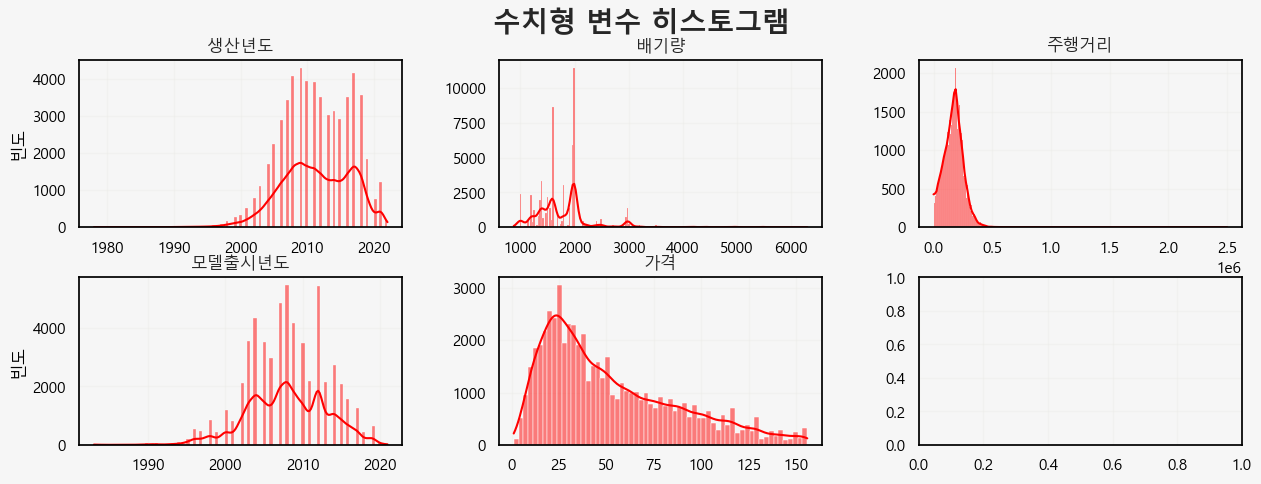

In [499]:
num_eda.histplot()

### **Insight**

**1. 모델 출시년도는 2000 ~ 2010 년 사이에 가장 많은 것으로 보인다**

**2. 연식의 경우에는 정규 분포 양상을 띔**

**3. 주행거리와 배기량, 가격 모두 오른쪽으로 꼬리가 긴 분포 형태로 이상치가 있는 것으로 보임**

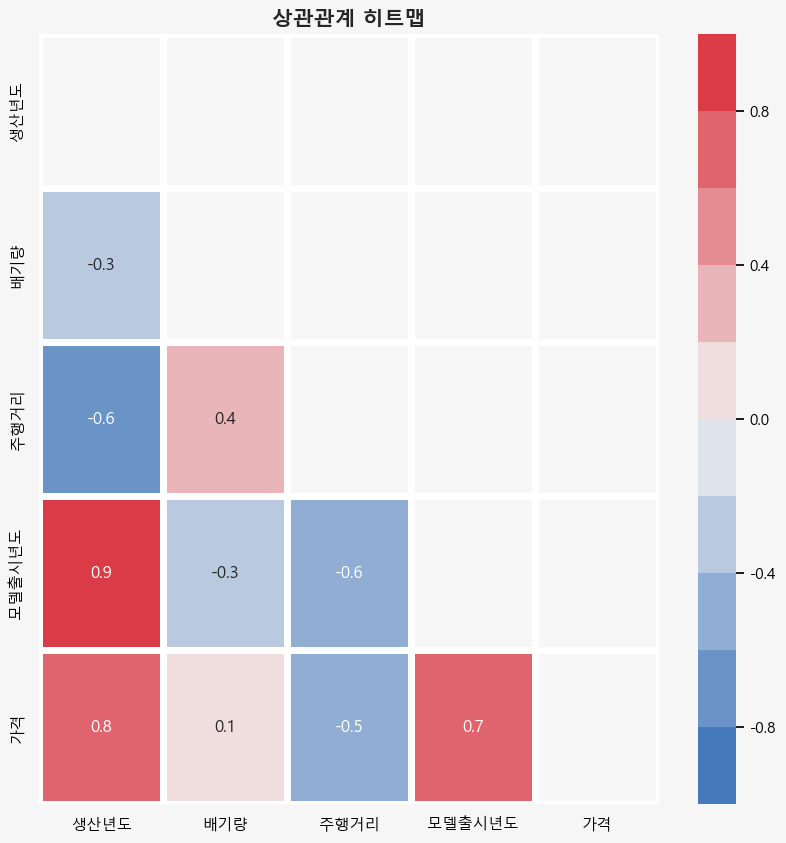

In [500]:
num_eda.correlation()

### **Insight**

**1. 모델이 출시된지 얼마 안됐을 때 주행거리가 짧다. (생산년도가 짧거나 모델 출시년도가 짧은 경우 -0.6 의 상관관계)**

**2. 가격과 상관관계가 강한 변수는 생산년도(0.8), 모델 출시년도 (0.7), 주행거리 (-0.5) 순이였다.**

**3. 생산년도와 모델 출시년도는 매우 강한 상관관계를 보인다. 트리 계열이 아닌 모델을 사용 할 때는 두 변수에 대한 규제를 넣든지, 변수를 선택 할 필요가 있겠다.**

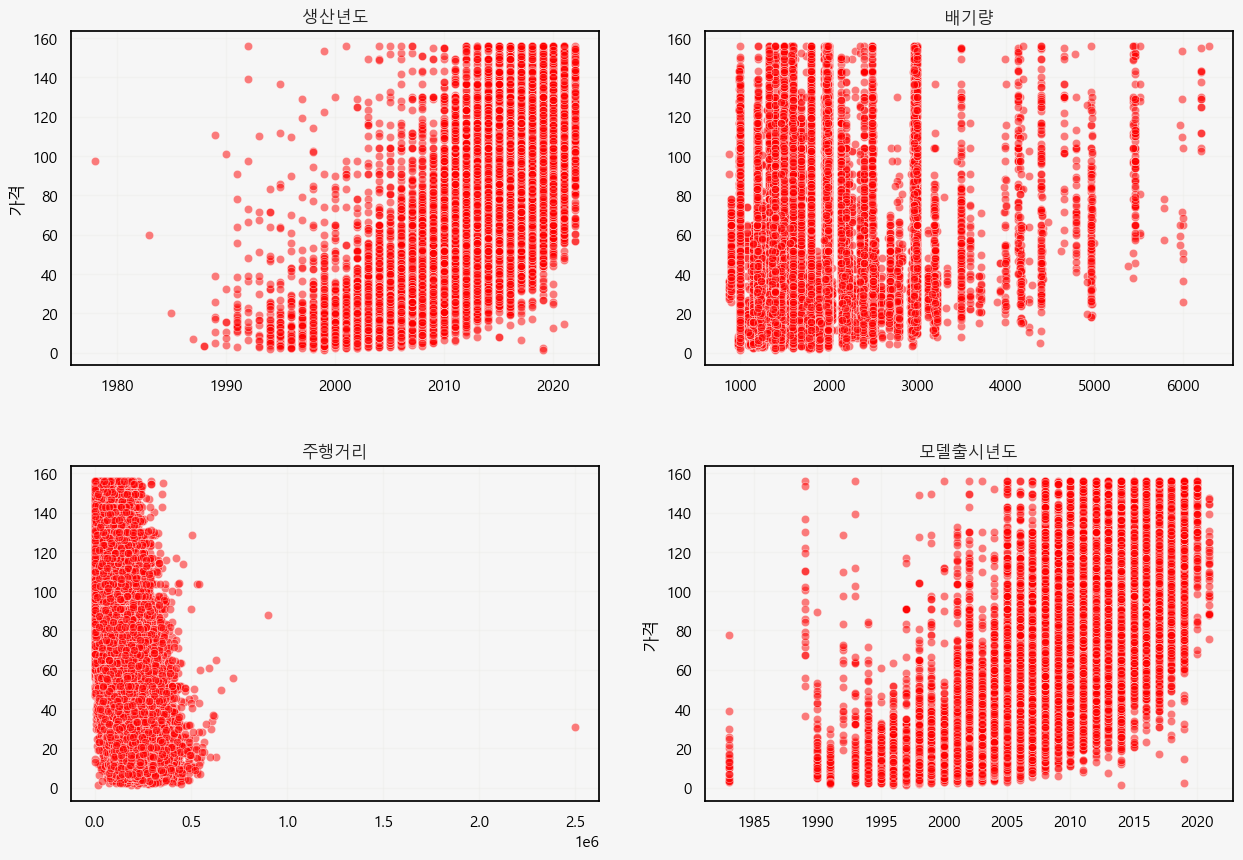

In [501]:
num_eda.scatterplot('가격')

### **Insight**

**1. 가격과 모델 출시년도, 생산년도의 산점도를 보면 비선형적으로 증가하고 있는 모습을 볼 수 있다.**

**2. 모델 출시년도와 생산년도를 보면 1985년에 생산된 차량 중 하나의 가격이 꽤나 높은 모습을 보인다. 올드카 매니아가 관리한 차량이였을까? :)**

**3. 주행거리를 보면 대부분 비슷한 곳에 분포하나 하나의 데이터가 엄~청나게 멀리 떨어져 있는 모습을 볼 수 있다.**

**4. 배기량에서는 딱히 패턴을 찾을 수가 없다.**

# **Modeling**

* 모델링을 하기 전 러프하게 피쳐 중요도를 알아보자 

In [502]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_absolute_error
import time

model = RandomForestRegressor()


X,y = df.drop('가격',axis = 1), df['가격']
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 42)

In [503]:
class Roughscatch:
    
    def __init__(self,estimator,X,y):
        
        self.estimator = estimator
        self.X = X
        self.y = y 
        self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(self.X,self.y,random_state = 42)
        
    
    def train_time(self):
        
                
        start_time = time.time()
        self.estimator.fit(self.x_train,self.y_train)
        end_time = time.time()
        
        self.train_time = end_time - start_time
        
        print(f'학습 시간 : {self.train_time :.2f}')
        
        start_time = time.time()
        self.estimator.predict(x_train)
        end_tiem = time.time()
        self.predict_time = end_tiem - start_time
        
        print(f'예측 시간 : {self.predict_time :.2f}')
        
        
    def kfold_oof(self,n,esitmator = None):
        
        if esitmator is not None:
            self.estimator = esitmator    
        
        cv = KFold(n_splits = n, shuffle = True, random_state = 42)
        

        self.valid_score_list =  []
        self.oof_score_list = []
        
        start_time = time.time()
        for i,(train_idx,valid_idx) in enumerate(cv.split(self.x_train,self.y_train)):
            print('--' * 40)
            x_train,y_train = self.x_train.iloc[train_idx], self.y_train.iloc[train_idx]
            x_valid,y_valid = self.x_train.iloc[valid_idx], self.y_train.iloc[valid_idx]
            
            self.estimator.fit(x_train,y_train)
            
            train_pred = self.estimator.predict(x_train)
            valid_pred = self.estimator.predict(x_valid)
            test_pred = self.estimator.predict(self.x_test)
            
            train_score = round(mean_absolute_error(y_train,train_pred),2)
            valid_score = round(mean_absolute_error(y_valid,valid_pred),2)
            oof_score = round(mean_absolute_error(self.y_test,test_pred),2)
            
            print(f'{blu}{i + 1} FOLD TRAIN SET SCORE{res} : {red}{train_score}')
            print(f'{blu}{i + 1} FOLD VALID SET SCORE{res} : {red}{valid_score}')
            print(f'{blu}{i + 1} MODEL OOF SCORE{res} : {red}{oof_score}')
            
            self.valid_score_list.append(valid_score)
            self.oof_score_list.append(oof_score)
            print('--' * 40)
        print('--' * 40)    
        self.valid_score = round(np.mean(self.valid_score_list),3)
        self.oof_score = round(np.mean(self.oof_score_list),3)
        print(f'{blu}{5} FOLD VALID AVG SCORE : {mgt}{self.valid_score}{res}')
        print(f'{blu}{5} FOLD OOF AVG SCORE : {mgt}{self.oof_score}{res}')
        
        end_time = time.time()
        
        print(f'{blu}소요 시간 : {end_time - start_time : .2f}{blu}')
        
        
    def feature_importance(self):
        
        self.result = pd.DataFrame()
        self.estimator.fit(self.x_train,self.y_train)
        self.result['feature'] = self.x_train.columns
        self.result['importance'] = self.estimator.feature_importances_
        
        order = self.result.sort_values(by = 'importance', ascending = False)['feature']
        
        plt.figure(figsize = (10,5))
        sns.barplot(data = self.result,
                    x = 'importance',
                    y = 'feature',
                    order = order,
                    palette = 'YlOrRd_r')
        plt.title('Feature Importance')


In [504]:
rough = Roughscatch(estimator = RandomForestRegressor(),
                    X = X, y = y)

**모델 학습 시간**

In [505]:
rough.train_time()

학습 시간 : 13.23
예측 시간 : 0.92


# **Insight**

**대략 하이퍼파라미터 튜닝한다고 2000번 정도 돌리면 각 모델 당 최대 40분가량 걸리겠구나**

**하이퍼 파라미터 튜닝을 반복하지 않도로 한 번에 제대로 끝내야겠다**


In [506]:
rough.kfold_oof(n = 5)

--------------------------------------------------------------------------------
1 FOLD TRAIN SET SCORE : 2.43
1 FOLD VALID SET SCORE : 6.51
1 MODEL OOF SCORE : 6.42
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 FOLD TRAIN SET SCORE : 2.44
2 FOLD VALID SET SCORE : 6.42
2 MODEL OOF SCORE : 6.44
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 FOLD TRAIN SET SCORE : 2.46
3 FOLD VALID SET SCORE : 6.3
3 MODEL OOF SCORE : 6.43
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
4 FOLD TRAIN SET SCORE : 2.42
4 FOLD VALID SET SCORE : 6.66
4 MODEL OOF SCORE : 6.46
--------------------------------------------------------------------------------
-------------

In [507]:
# 조금 일반화 성능을 줘보고 해보자 

model = RandomForestRegressor()
params = {
    'max_depth': 30,
    'min_samples_leaf': 15
}

model.set_params(**params)

rough.kfold_oof(n = 5, esitmator = model)

--------------------------------------------------------------------------------
1 FOLD TRAIN SET SCORE : 6.44
1 FOLD VALID SET SCORE : 7.25
1 MODEL OOF SCORE : 7.18
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 FOLD TRAIN SET SCORE : 6.45
2 FOLD VALID SET SCORE : 7.1
2 MODEL OOF SCORE : 7.17
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 FOLD TRAIN SET SCORE : 6.46
3 FOLD VALID SET SCORE : 6.99
3 MODEL OOF SCORE : 7.15
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
4 FOLD TRAIN SET SCORE : 6.4
4 FOLD VALID SET SCORE : 7.41
4 MODEL OOF SCORE : 7.2
--------------------------------------------------------------------------------
---------------

# **Insight**

-  **사실 일반화성능을 좀 높히면 TEST SCORE 가 확! 올라갈줄 알았는데 그러진 않았다.**
-  **일반화 성능을 높히기 위해 하이퍼 파라미터를 설정했더니 훈련 셋에도 과소적합이 되고, validation set에도 과소 적합이 된다.**
-  **물론 하이퍼파라미터를 감으로 설정한거라 정확하지 않을 수 있다.**
-  **좀 더 하이퍼파라미터를 튜닝도 해보고 모델도 잘 설정해보자.**

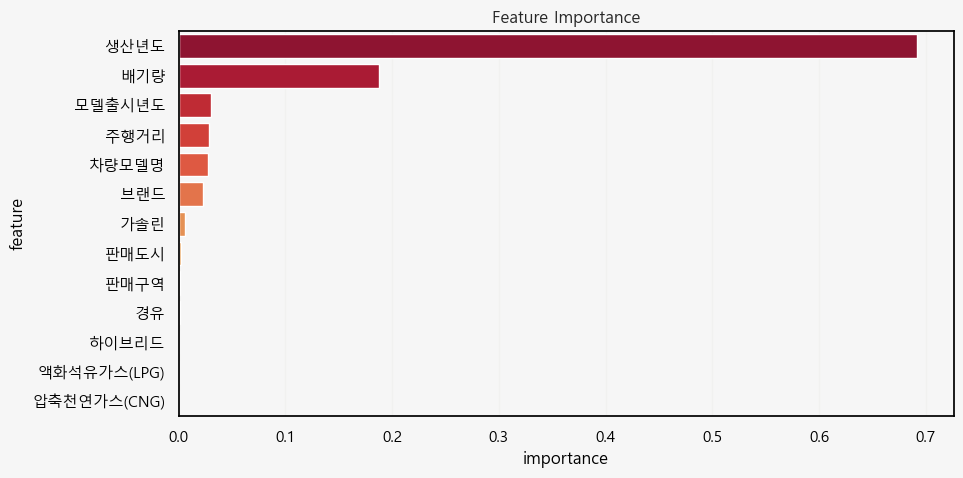

In [508]:
rough.feature_importance()

* **물론 생산년도의 변수 중요도가 가장 높았다.** 
* **그 다음은 배기량과 주행거리**

* **판매도시와 판매구역의 경우에는 유의미한 차이를 보이지 않는다.**
* **Feature engineering 을 빡세게 하기 보다 해당 변수들을 제거하고 일반화 성능을 높혀보자** 

### **KEY** TRAIN SET의 가격을 보면 유심히 봐야 할 것이 있다

In [509]:
df['가격'].value_counts()

25.875000     843
38.875000     690
24.562500     679
51.875000     661
23.265625     632
             ... 
22.203125       1
10.718750       1
115.625000      1
138.250000      1
23.125000       1
Name: 가격, Length: 1912, dtype: int64

**가격 부분에서 반복되는 값들이 존재한다. 어떤 데이터들은 843개나 같은 가격을 가지고 있다.**

**해당 가격이 나오는 특정한 패턴들이 있을까? 있다면 해당 패턴의 데이터들을 예측 할 때는 해당 값으로 예측하면 된다**

In [510]:
def find_pattern(data, num):
    
    data_size = len(data)
    result = pd.DataFrame()
    
    result['가격'] = data['가격'].value_counts().keys()
    result['빈도'] = data['가격'].value_counts().values
    
    cond = result['빈도'] > num
    
    pattern_value = result.loc[cond,'가격']
    
    
    pattern_size = len(data[data['가격'].isin(pattern_value)])
    proportion = round(pattern_size/data_size * 100)
    
    print(f'전체 가격 {blu}{data_size}{res} 개 중 같은 가격이 {blu}{num}{res} 번 이상 반복되는 데이터 개수 {blu}{pattern_size}{res}개 비율 {blu}{proportion}%{res}')

In [511]:
for num in [10,50,100,300]:
    
    find_pattern(df,num)

전체 가격 57920 개 중 같은 가격이 10 번 이상 반복되는 데이터 개수 54135개 비율 93%
전체 가격 57920 개 중 같은 가격이 50 번 이상 반복되는 데이터 개수 45148개 비율 78%
전체 가격 57920 개 중 같은 가격이 100 번 이상 반복되는 데이터 개수 37746개 비율 65%
전체 가격 57920 개 중 같은 가격이 300 번 이상 반복되는 데이터 개수 18187개 비율 31%


**같은 가격이 반복되는 것의 개수가 많기 때문에 Tree 계열의 모델들이 적합 할 것으로 보인다**

### **가격을 회귀가 아닌 분류 문제로 취급하고 PCA를 통해 데이터의 패턴을 더욱 명확하게 봐보자**

* 가격이 100번 이상 반복되는 것들을 살펴보자 

In [512]:
data = df.copy()

result = pd.DataFrame()

result['가격'] = df['가격'].value_counts().keys()
result['빈도'] = df['가격'].value_counts().values

mapping = {x:1 for x in result[result['빈도'] > 500]['가격'].values}

data['가격'] = data['가격'].map(mapping).fillna(0) # 빈도가 100번 이상인 경우엔 1로 mapping, 아닌 경우엔 0으로 mapping

Text(0, 0.5, '제 2성분')

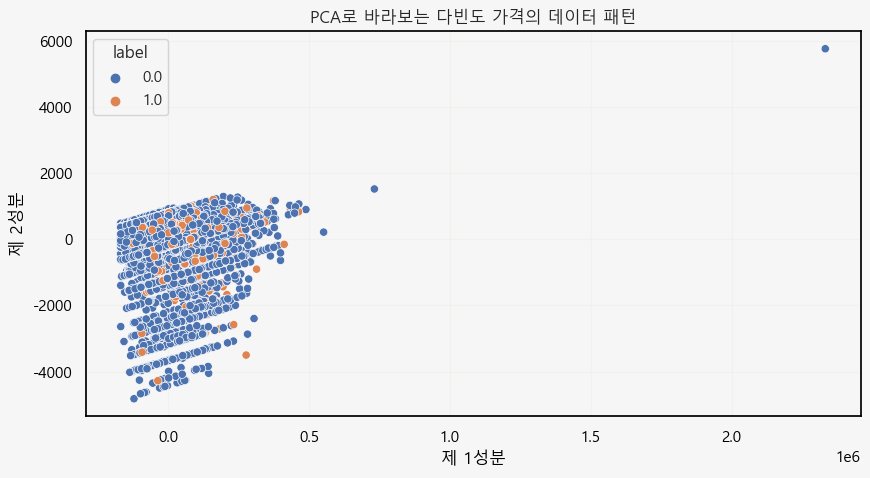

In [513]:
from sklearn.decomposition import PCA

label = data['가격']

pca = PCA(n_components = 2)

pca_df = pd.DataFrame(pca.fit_transform(data.drop('가격',axis = 1)))

pca_df['label'] = label

plt.figure(figsize = (10,5))

sns.scatterplot(data = pca_df,
                x = 0,
                y = 1,
                hue = 'label')
plt.title('PCA로 바라보는 다빈도 가격의 데이터 패턴')
plt.xlabel('제 1성분')
plt.ylabel('제 2성분')

**같은 가격이 300개 이상 존재하는 가격들과 아닌 데이터들의 패턴을 살펴보긴 힘들다**

**패턴이 명확하다면 특정 n 개 이상 반복되는 데이터들을 따로 분류 후 Classifier로 하려고 했으나 특정한 패턴이 보이지 않는다.**

# Modeling

In [514]:
modeling_feature = ['생산년도', '모델출시년도', '브랜드', '차량모델명', '주행거리', '배기량',
                '압축천연가스(CNG)', '경유', '가솔린', '하이브리드', '액화석유가스(LPG)'] # 판매 도시와 판매구역은 Feature Importance에서 유의미하지 않았기에 제거 

In [515]:
brand_mapping = {v:k for k,v in original_label['브랜드'].items()}
car_mapping = {v:k for k,v in original_label['차량모델명'].items()}

In [516]:
test['브랜드'] = test['브랜드'].map(brand_mapping).values
test['차량모델명'] = test['차량모델명'].map(car_mapping).values

In [517]:
test = test[modeling_feature]

In [518]:
from sklearn.model_selection import GridSearchCV,KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from tqdm import tqdm

In [519]:
class RoughGridsearch:
    
    def __init__(self,X,y,models,params):
        
        self.X = X
        self.y = y
        self.models = models
        self.params = params
        
    def gridsearch(self, n):
        
        cv = KFold(n_splits = n, shuffle = True, random_state = 42)
        
        self.best_models = []
        self.best_params = []
        self.best_scores = []
        
        for i,model in tqdm(enumerate(self.models)):
            
            grid_model = GridSearchCV(estimator = model, param_grid = self.params[i], cv = cv,
                                    scoring = 'neg_mean_absolute_error',verbose = 1)
            
            grid_model.fit(self.X,self.y)
            
            self.best_params.append(grid_model.best_params_)
            self.best_scores.append(np.abs(grid_model.best_score_))
            self.best_models.append(grid_model.best_estimator_)
            
            pprint(self.best_params)

            
    def oof_pred(self,n,X_TRAIN,Y_TEST):
        
        cv = KFold(n_splits = n, shuffle = True, random_state = 42)
        
        self.oof_scores = []
        
        for i,model in enumerate(self.models):
            
            pred_list = []
            
            for train_idx,test_idx in cv.split(self.X,self.y):
                
                self.x_train,self.y_train = self.X.iloc[train_idx],self.y.iloc[train_idx]
                
                model = self.best_models[i]
                
                model.fit(self.x_train,self.y_train)
                
                pred = model.predict(X_TRAIN)
                
                pred_list.append(pred)
                
            result_pred = np.mean(pred_list,axis = 0)
            self.oof_scores.append(mean_absolute_error(Y_TEST,result_pred))

In [521]:
X,y = df[modeling_feature],df['가격']


x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42)

models = [LGBMRegressor(verbose = -1),XGBRegressor(),CatBoostRegressor(verbose = 0)]

param_grid = [
        {'n_estimators': [300,500,1000],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.5],
        'num_leaves': [31, 50, 100]
    },
        {
        'n_estimators': [300,500,1000],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    {
        'n_estimators': [300,500,1000],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.5],
        'l2_leaf_reg': [1, 3, 5]
    }
]

In [525]:
rough_gridsearch = RoughGridsearch(x_train,y_train,models,param_grid)

In [526]:
rough_gridsearch.gridsearch(n = 3)

0it [00:00, ?it/s]

Fitting 3 folds for each of 81 candidates, totalling 243 fits


1it [04:55, 295.74s/it]

[{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'num_leaves': 31}]
Fitting 3 folds for each of 108 candidates, totalling 324 fits


2it [23:25, 774.81s/it]

[{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'num_leaves': 31},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.1,
  'max_depth': 7,
  'n_estimators': 500,
  'subsample': 1.0}]
Fitting 3 folds for each of 81 candidates, totalling 243 fits


3it [32:15, 645.30s/it]

[{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'num_leaves': 31},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.1,
  'max_depth': 7,
  'n_estimators': 500,
  'subsample': 1.0},
 {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}]


In [527]:
rough_gridsearch.best_scores

[6.0918034224149205, 6.058082103729248, 6.008770328157891]

### **최적의 모델들을 가지고 OOF ENSEMBLE 을 시도해보자**

Text(0, 0.5, '실제값')

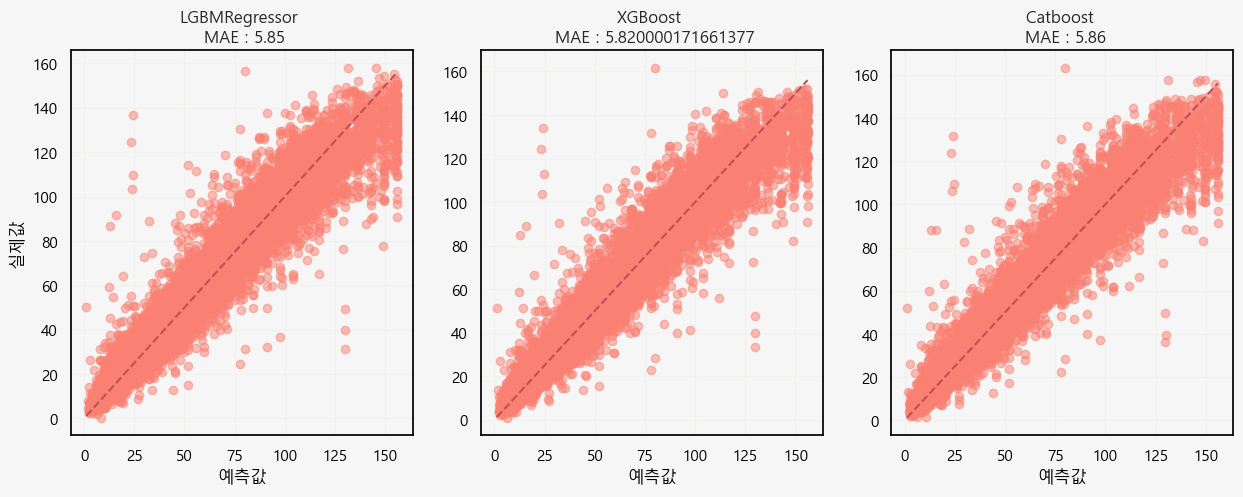

In [532]:
cv = KFold(n_splits = 5, random_state = 42,shuffle = True)

ensemble_pred = []

fig,ax = plt.subplots(ncols = 3, figsize = (15,5))

model_names = ['LGBMRegressor','XGBoost','Catboost']

for i,model in enumerate(rough_gridsearch.best_models):
    
    oof_preds = []
    
    for train_idx,test_idx in cv.split(x_train,y_train):
        
        train_x,train_y = x_train.iloc[train_idx],y_train.iloc[train_idx]
        model.fit(train_x,train_y)
        pred = model.predict(x_test)
        oof_preds.append(pred)
        
    result = np.mean(oof_preds,axis = 0)
    score = round(mean_absolute_error(y_test,result),2)
    
    ensemble_pred.append(result)
    
    ax[i].scatter(y_test,result, alpha = 0.5, c = 'salmon')
    ax[i].plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], ls = '--', c = 'r')
    ax[i].set_title(f'{model_names[i]} \n MAE : {score}')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('예측값')
    
ax[0].set_ylabel('실제값')

* 확실히 단일 모델 예측보다 OOF ENSEMBLE을 시도한 것이 MAE가 수치적으로 안정적이였다.

Text(0.5, 1.0, 'OOF ENSEMBLE \n MAE : 5.79')

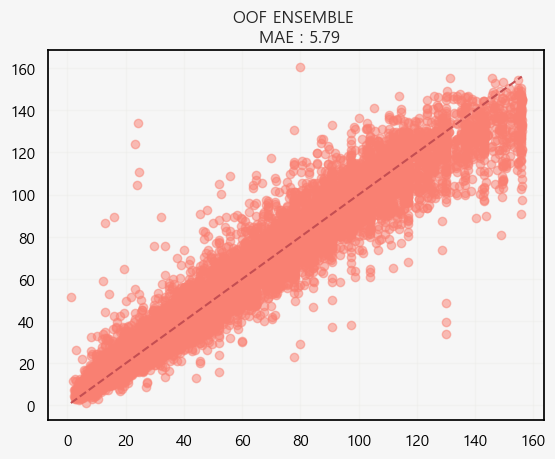

In [533]:
ensemble_pred = np.mean(ensemble_pred,axis = 0) # 3 개의 모델을 앙상블 해보자 
score = round(mean_absolute_error(y_test,ensemble_pred),2)

plt.scatter(y_test,ensemble_pred, c = 'salmon',alpha = 0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], c = 'r', ls = '--')
plt.title(f'OOF ENSEMBLE \n MAE : {score}')

### **단일 모델을 가지고 OOF 한 것보다 앙상블 한 것의 MAE 가 더 낮았다 !**

In [542]:
for col in test.describe(include = 'O').columns:
    
    test[col] = test[col].astype(int)

In [543]:
cv = KFold(n_splits = 5, random_state = 42,shuffle = True)

ensemble_pred = []

model_names = ['LGBMRegressor','XGBoost','Catboost']

for i,model in enumerate(rough_gridsearch.best_models):
    
    oof_preds = []
    
    for train_idx,test_idx in cv.split(X,y):
        
        train_x,train_y = X.iloc[train_idx],y.iloc[train_idx]
        model.fit(train_x,train_y)
        
        pred = model.predict(test)
        oof_preds.append(pred)
        
    result = np.mean(oof_preds,axis = 0)
    
    ensemble_pred.append(result)

In [550]:
sub = pd.read_csv('sample_submission.csv')
sub['가격'] = np.mean(ensemble_pred,axis = 0)
sub

,ID,가격
0,TEST_00000,91.616168
1,TEST_00001,24.822108
2,TEST_00002,80.796601
3,TEST_00003,126.289945
4,TEST_00004,48.579691
...,...,...
14475,TEST_14475,42.025386
14476,TEST_14476,24.072528
14477,TEST_14477,105.528987
14478,TEST_14478,59.563666


In [551]:
sub.to_csv('데이콘 OOF 앙상블.csv',index = False)